In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + 4x^2 - 2x - 0.5$.

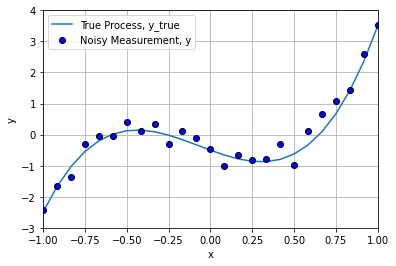

In [2]:
nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [3]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

In [4]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    # TODO
    # To-do
    
    # 1. create the empty array of ones
    Design_Matrix = np.ones((x.shape[0],M+1)) # use the np.ones function
    
    # 2. use a for loop to populate the Design_Matrix columnwise
    for j in range(M):
        Design_Matrix[:,j+1] = x**(j+1)#provide an expression for each column of Design_Matrix
    
    
    return Design_Matrix


M = 10
Xtrain = design_matrix(xtrain, M)
Xval = design_matrix(xval,M)
Xtest = design_matrix(xtest,M)
print(Xtrain.shape)

(15, 11)


The train error is, 0.167
The test error is, 1.264


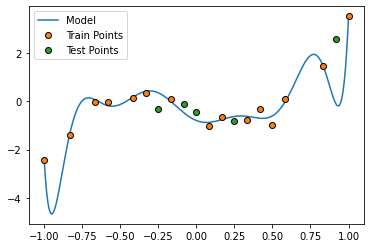

w = 
[[  -0.8 ]
 [  -2.48]
 [  19.27]
 [   8.32]
 [-173.74]
 [   1.46]
 [ 589.24]
 [ -12.59]
 [-789.49]
 [   8.26]
 [ 356.06]]


In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# TODO
# fit the polynomial model using linear regression 
# 1. Use 'reg' as name for your regressor and set fit_intercept = False
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain,ytrain)

# print the training error RMSE
# 1. generate the predictions y_train_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)
y_train_pred = reg.predict(Xtrain)
mse_train = mean_squared_error(ytrain, y_train_pred, squared=False)


# print the test error RMSE
# 1. generate the predictions y_test_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)
y_test_pred = reg.predict(Xtest)
mse_test = mean_squared_error(ytest, y_test_pred, squared=False)

# see what happens to the error values above as M is set to a high number
print(f"The train error is, {mse_train:.3f}")
print(f"The test error is, {mse_test:.3f}")


# plotting
x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

w= reg.coef_

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,4])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

In [63]:
nsamp = 25 # number of samples taken
p = np.array([2, 3, -2, -0.5, 4]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

### Polynominal Fitting Review

We want to find a model that fits the following data

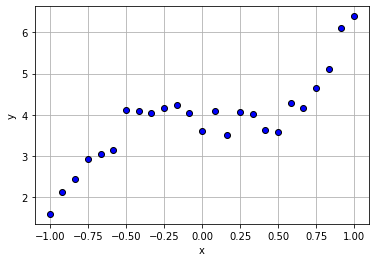

In [64]:
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.show()

A line in this case would not work well, because this has the shape of a polynominal. Polynominals look like:

$$y = x + 3x^4 + 5x^5$$
$$y = 1 + 4x^2 + x^3 + x^7$$

In general, a $n$-th order polynominal is written as

$$y = w_0 + w_1x + w_2x^2 + \cdots + w_nx^n.$$

So how would you determine which polynominal best fits this data? 
- Do you know what order is this polynomial? 
- Do you know if it contains an $x^3$ term?
- Do you know how many weights you need?

In many cases, the answer is no. So the best thing we can do is to try polynimials of different orders and see which one fits the data with the smallest MSE. There is a catch here!

We have data points $(y_1, x_1)$, $(y_2, x_2)$, $\cdots$, $(y_m, x_m)$. Thus we have a set of linear equations

$$y_1 = w_0 + w_1x_1 + w_2x_1^2 + \cdots + w_nx_1^n$$
$$y_2 = w_0 + w_1x_2 + w_2x_2^2 + \cdots + w_nx_2^n$$
$$\vdots$$
$$y_m = w_0 + w_1x_m + w_2x_m^2 + \cdots + w_nx_m^n$$

$$y_1 = w_0 + w_1x_1 + w_2x_1^2 + \cdots + w_nx_1^n \rightarrow y_1 = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^n
\end{bmatrix}\begin{bmatrix}
w_0\\
w_1\\
w_2\\
\vdots\\
w_n
\end{bmatrix}$$

$$\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m
\end{bmatrix} = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^n\\
1 & x_2 & x_2^2 & \cdots & x_2^n\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_m & x_m^2 & \cdots & x_m^n
\end{bmatrix}\begin{bmatrix}
w_0\\
w_1\\
w_2\\
\vdots\\
w_n
\end{bmatrix}$$

Which can be written as $\mathbf{Y} = \mathbf{X}\mathbf{w}$ and solved using $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y} = \mathbf{w}$.

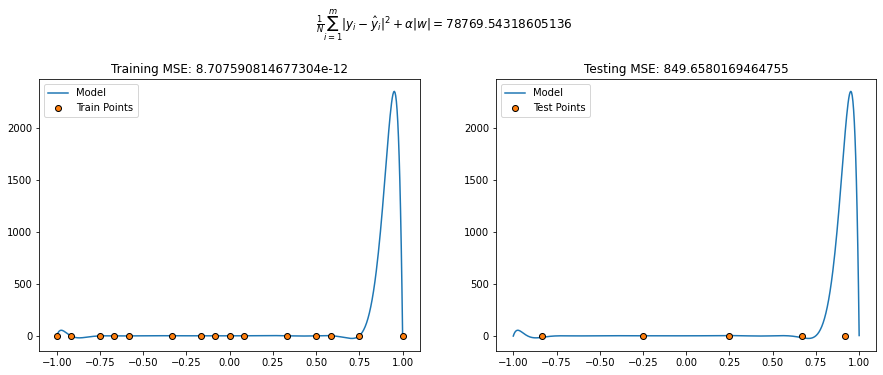

w = 
[[     3.61]
 [    -1.56]
 [    72.68]
 [   319.4 ]
 [ -1121.17]
 [ -5118.73]
 [  5436.8 ]
 [ 26825.04]
 [ -8287.45]
 [-51994.27]
 [  -209.25]
 [ 16857.77]
 [ -2808.41]
 [ 31876.87]
 [  8676.17]
 [  6736.82]
 [ 16470.42]
 [-14066.86]
 [  6066.49]
 [-11432.09]
 [-24295.89]]


In [71]:
M = 20
# Create Design Matrix
Xtrain = design_matrix(xtrain, M)
Xval = design_matrix(xval, M)
Xtest = design_matrix(xtest, M)

# Fit model
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain,ytrain)

# Get Training and Test Error
y_train_pred = reg.predict(Xtrain)
y_test_pred = reg.predict(Xtest)
mse_train = mean_squared_error(ytrain, y_train_pred, squared= False)
mse_test = mean_squared_error(ytest, y_test_pred, squared= False)

# Plot image
x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

w= reg.coef_

lasso_loss = mse_train + np.linalg.norm(w)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# plt.rcParams["font.size"] = 10
fig.suptitle(r'$\frac{1}{N}\sum_{i=1}^{m}{\|y_i - \hat{y}_i\|^2} + \alpha\|w\| = $' + "{}".format(lasso_loss), y=1.08)

axs[0].plot(x_line, y_line)
axs[0].plot(xtrain,ytrain,'o',markeredgecolor='black')
axs[0].set_title("Training MSE: {}".format(mse_train))
axs[0].legend(['Model','Train Points'])

axs[1].plot(x_line, y_line)
axs[1].plot(xtest,ytest,'o',markeredgecolor='black')
axs[1].set_title("Testing MSE: {}".format(mse_test))
axs[1].legend(['Model', 'Test Points'])

plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

### weight based regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


- Ridge: L2 norm regularizer $\displaystyle\|y - Xw\|^2_2 + \alpha\|w\|^2_2$

Training error: 0.24142750636245655, Validation error: 0.3655027361907197, Test error: 0.3326866022770457


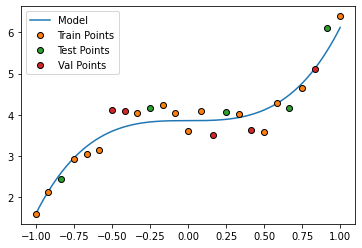

w = 
[[ 0.  ]
 [ 0.  ]
 [-0.  ]
 [ 2.  ]
 [ 0.  ]
 [ 0.26]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]


In [72]:
# Lasso
reg = linear_model.Lasso(alpha=.02, fit_intercept=True)
reg.fit(Xtrain,ytrain)

y_train_pred = reg.predict(Xtrain)
y_val_pred = reg.predict(Xval)
y_test_pred = reg.predict(Xtest)

mse_train = mean_squared_error(ytrain, y_train_pred, squared=False)
mse_val = mean_squared_error(yval, y_val_pred, squared=False)
mse_test = mean_squared_error(ytest, y_test_pred, squared=False)

print(f"Training error: {mse_train}, Validation error: {mse_val}, Test error: {mse_test}")

# plotting

x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)


plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

Training error: 0.2069301329139223, Validation error: 0.39937682669354024, Test error: 0.3017514131270273


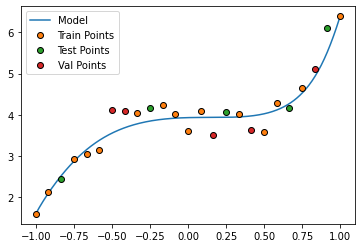

w = 
[[ 3.93]
 [ 0.1 ]
 [-0.62]
 [ 1.31]
 [ 0.1 ]
 [ 0.68]
 [ 0.28]
 [ 0.28]
 [ 0.22]
 [ 0.09]
 [ 0.14]
 [ 0.01]
 [ 0.07]
 [-0.02]
 [ 0.01]
 [-0.02]
 [-0.02]
 [-0.02]
 [-0.05]
 [-0.01]
 [-0.07]]


In [73]:
# Ridge Regression
reg = linear_model.Ridge(alpha=.05, fit_intercept=False)
reg.fit(Xtrain,ytrain)

y_train_pred = reg.predict(Xtrain)
y_val_pred = reg.predict(Xval)
y_test_pred = reg.predict(Xtest)

mse_train = mean_squared_error(ytrain, y_train_pred, squared=False)
mse_val = mean_squared_error(yval, y_val_pred, squared=False)
mse_test = mean_squared_error(ytest, y_test_pred, squared=False)

print(f"Training error: {mse_train}, Validation error: {mse_val}, Test error: {mse_test}")

# plotting

x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)


plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))